In [11]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np
import pandas as pd
import ezdxf
from scipy.spatial import Delaunay
from shapely.geometry import Polygon

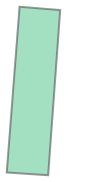

In [32]:
dxf_path = r"D:\01_Información\05_Ingeniería civil\02_Cursos\09_Programación\MENTHOR_Python aplicado a geotecnia\Clase 02\Densidades\Poligonos.dxf"

doc = ezdxf.readfile(dxf_path)

msp = doc.modelspace()

ext = msp.query('LWPOLYLINE[layer=="0"]')

lines_ext = []

for i in range(len(ext)):
    lines_ext.append(np.array(ext[i].get_points())[:,:2])

pol_ext = []
for i in range(len(ext)):
    pol_ext.append(Polygon(lines_ext[i]))

pol_ext[0]

In [12]:
file_path = r"D:\01_Información\05_Ingeniería civil\02_Cursos\09_Programación\MENTHOR_Python aplicado a geotecnia\Clase 02\Densidades\Densidades.xlsx"
df = pd.read_excel(file_path)

In [35]:
x = np.linspace(min(df["Este"]),max(df["Este"]),1000)
y = np.linspace(min(df["Norte"]),max(df["Norte"]),1000)
grid_x,grid_y = np.meshgrid(x,y)

In [ ]:
xy = np.column_stack((df["Este"],df["Norte"]))
triangulacion = Delaunay(xy)

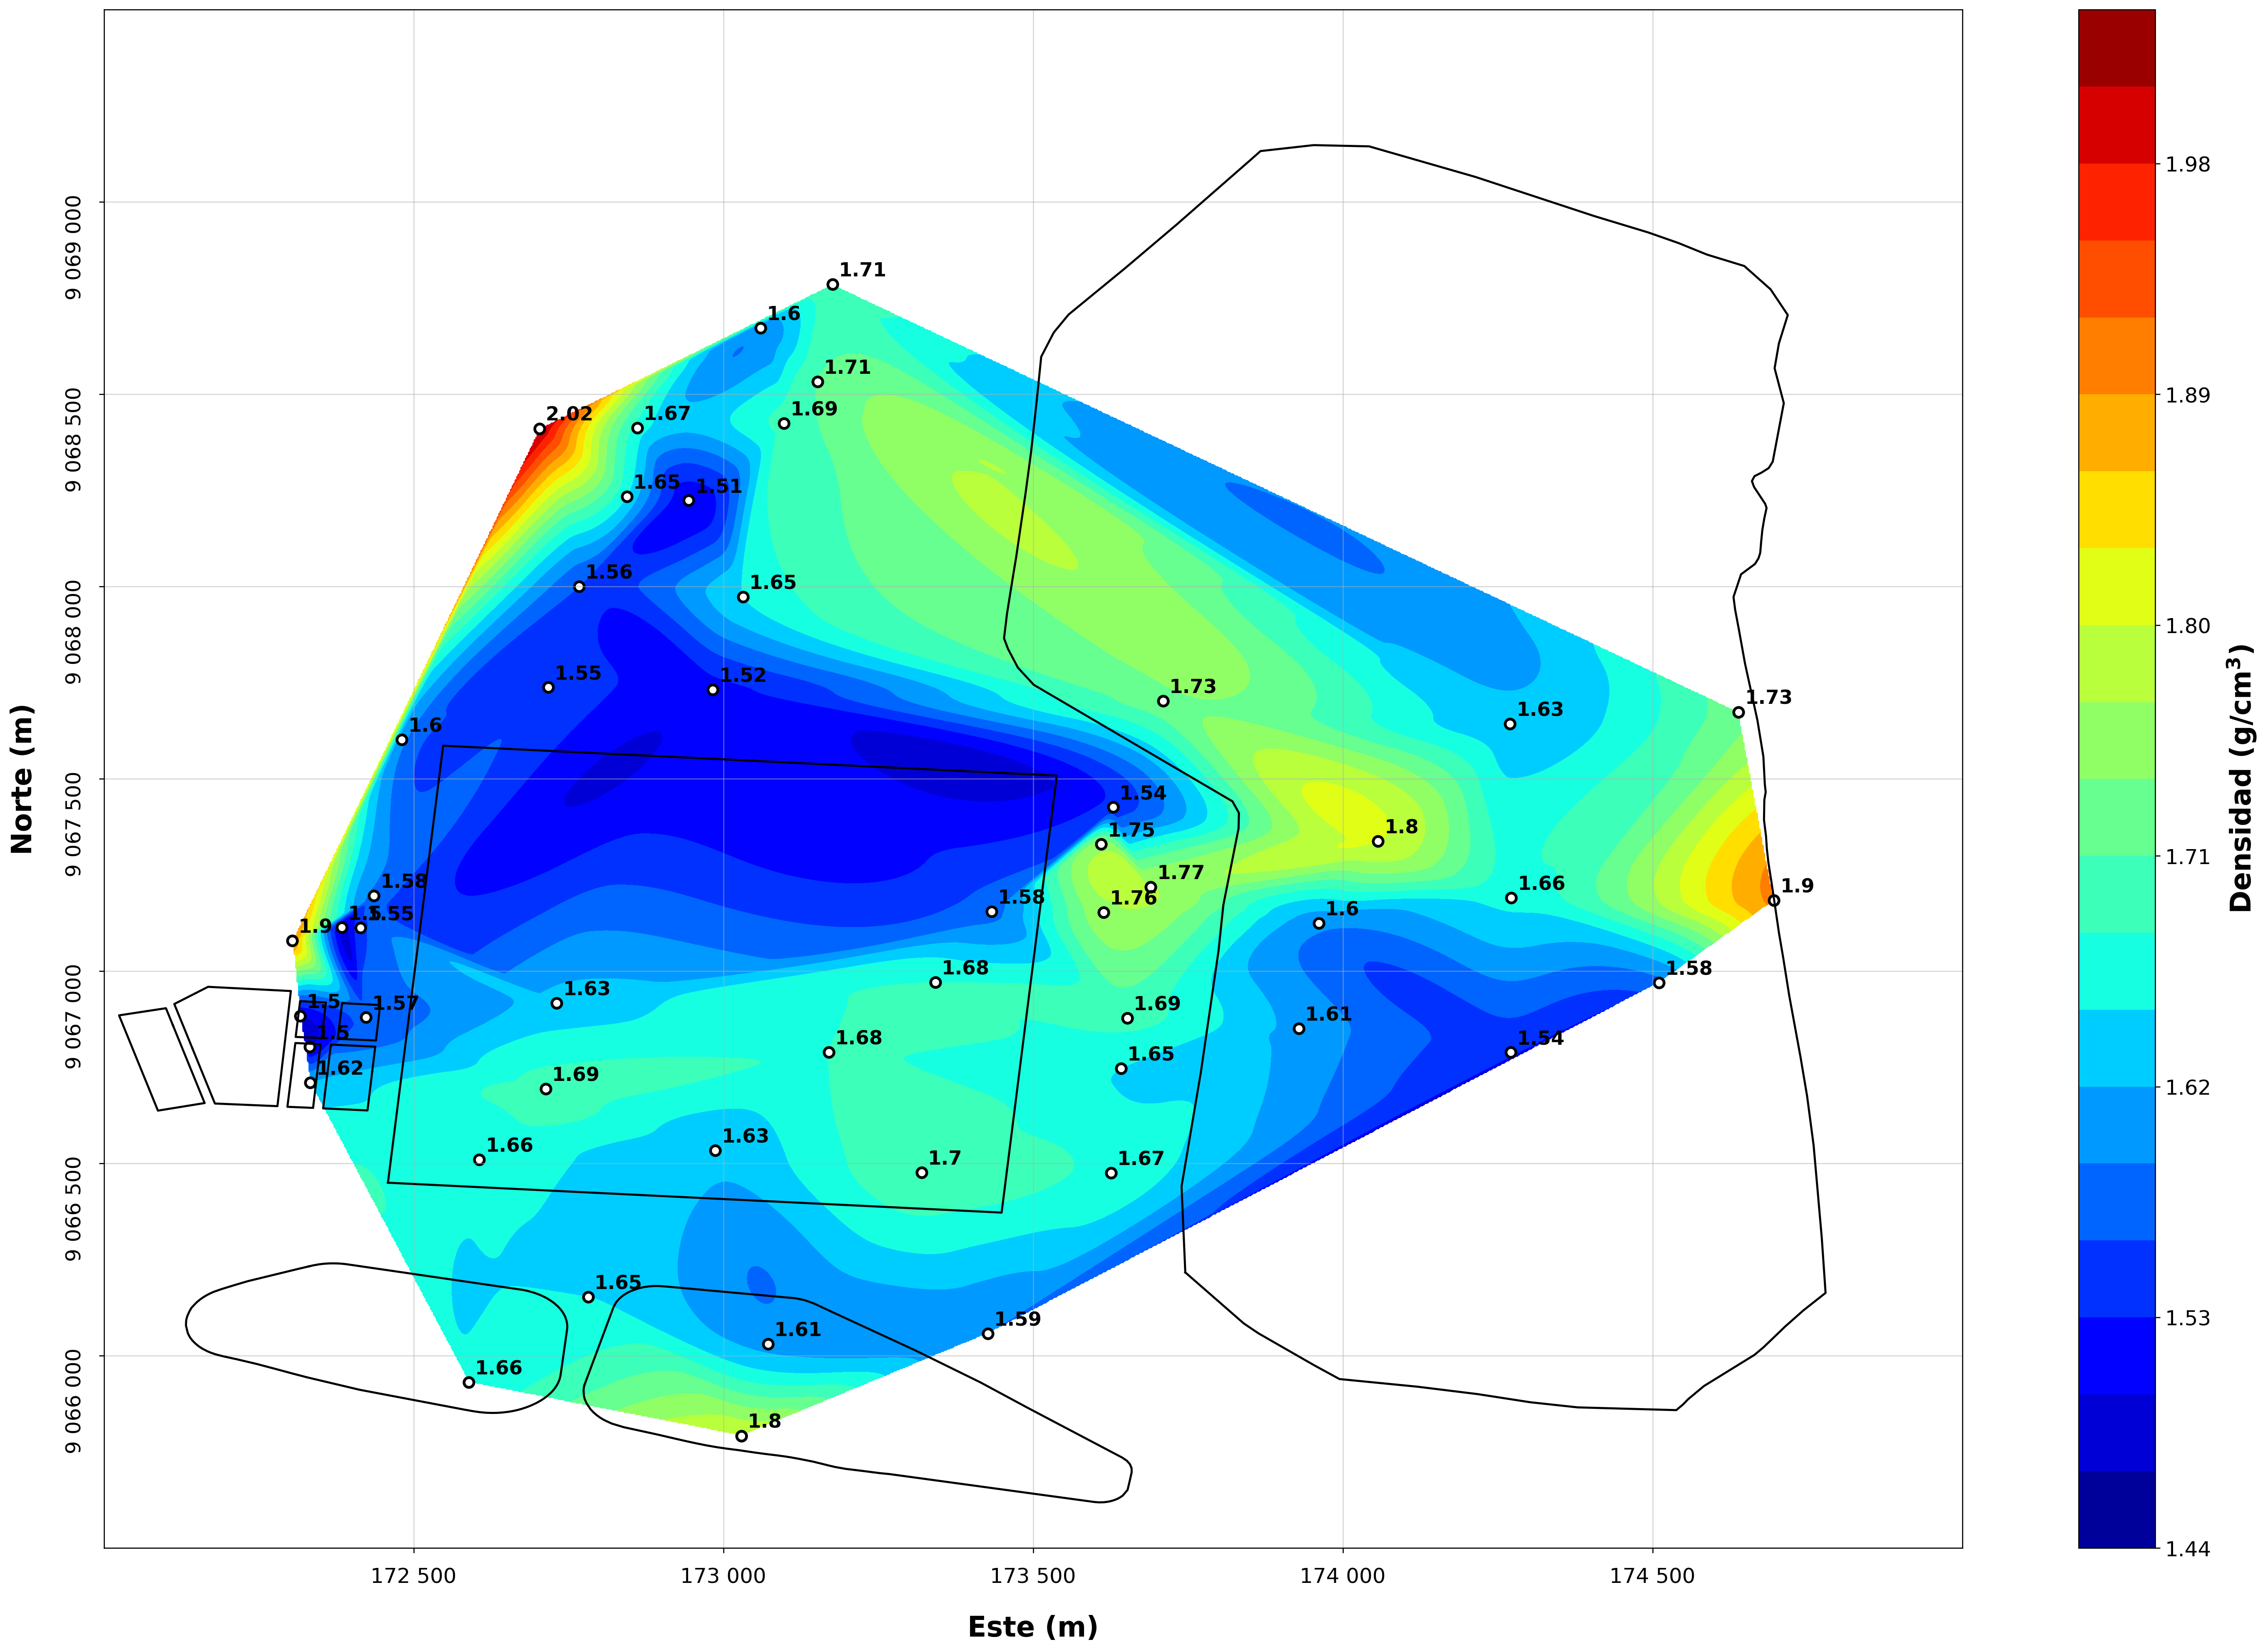

In [66]:
triang = mtri.Triangulation(df["Este"],df["Norte"],triangulacion.simplices)
inter_cubic = mtri.CubicTriInterpolator(triang,df["Densidad"],kind="geom")
z_cubic = inter_cubic(grid_x,grid_y)

#--------------------------------------------------------
# Crear graficas
fig,ax = plt.subplots(figsize=(30,20),dpi=240)
#--------------------------------------------------------
# Agregar poligonos
for p in pol_ext:
    ax.plot(*p.exterior.xy, c="k")
#--------------------------------------------------------
# Agregar mapa de color
pos = ax.contourf(grid_x,grid_y,z_cubic,levels=20,cmap="jet")
#--------------------------------------------------------
# Agregar puntos de densidad
ax.scatter(df["Este"], df["Norte"], s=50, c='white', marker="o", edgecolors='black', linewidth=2)

for i,dens in enumerate(df["Densidad"]):
    ax.text(df["Este"][i]+10,df["Norte"][i]+10,dens,fontsize=14,ha="left",va="bottom",c="black",fontweight="bold")

#--------------------------------------------------------
# Leyenda de escala de color
cbar = fig.colorbar(pos,ax=ax)
cbar.set_label("Densidad "+r"($\mathbf{g/cm^3}$)",fontsize=20,fontweight="bold",labelpad=10)
cbar.ax.tick_params(labelsize=15)
#--------------------------------------------------------
# Nombre de títulos
ax.set_ylabel("Norte (m)",fontsize=20,fontweight="bold",labelpad=20)
ax.set_xlabel("Este (m)",fontsize=20,fontweight="bold",labelpad=20)
#--------------------------------------------------------
# Etiquetas en los ejes
ax.set_ylim([9065500,9069500])
yticks = range(9066000,9069500,500)
yticks_labels = ["{:,}".format(val).replace(","," ") for val in yticks]
ax.set_yticks(yticks,yticks_labels,fontsize=15)

ax.set_xlim([172000,175000])
xticks = range(172500,175000,500)
xticks_labels = ["{:,}".format(val).replace(","," ") for val in xticks]
ax.set_xticks(xticks,xticks_labels,fontsize=15)

ax.tick_params(which="major",labelrotation=90,axis="y",pad=10)
ax.tick_params(which="major",labelrotation=0,axis="x",pad=10)
ax.grid(alpha=0.5)
#--------------------------------------------------------

plt.show()